In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv("/content/videogamesales.csv")
d.head()

d["Global_Sales"] = (d["NA_Sales"] + d["EU_Sales"] + d["JP_Sales"] + d["Other_Sales"])
d_sorted = d.sort_values(by="Global_Sales", ascending=False)
d_sorted.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6109,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8315,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
9743,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


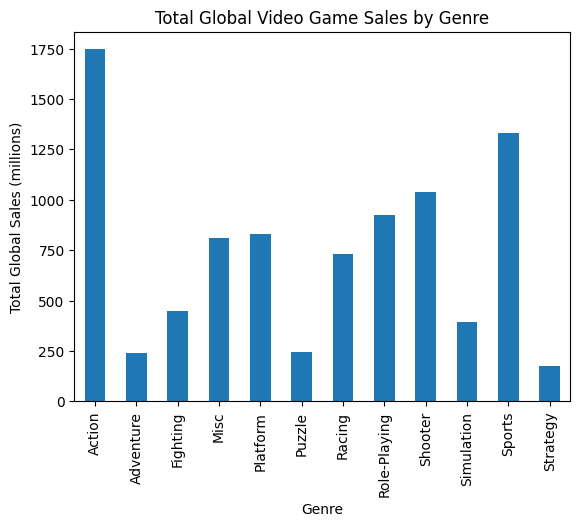

In [ ]:
genre_sales = d.groupby("Genre")["Global_Sales"].sum()
plt.figure()
genre_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (millions)")
plt.title("Total Global Video Game Sales by Genre")
plt.show()


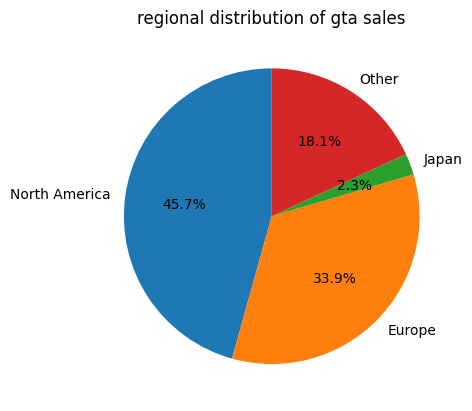

In [ ]:
gta_d = d[d["Name"].str.contains("Grand Theft Auto", case=False, na=False)].copy()

gta_d["EU_JP_Sales"] = gta_d["EU_Sales"] + gta_d["JP_Sales"]
gta_sales_region = {"North America": gta_d["NA_Sales"].sum(), "Europe": gta_d["EU_Sales"].sum(), "Japan": gta_d["JP_Sales"].sum(),"Other": gta_d["Other_Sales"].sum()}
plt.figure()
plt.pie(
    gta_sales_region.values(),
    labels=gta_sales_region.keys(),
    autopct="%1.1f%%",
    startangle=90
)
plt.title("regional distribution of gta sales")
plt.show()


In [ ]:
gta_filter = gta_d[["Name", "Platform", "Year", "EU_JP_Sales"]]
gta_filter.head()

,Name,Platform,Year,EU_JP_Sales
999,Grand Theft Auto,PS,1997.0,1.39
1290,Grand Theft Auto 2,PS,1998.0,2.07
1469,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,0.04
2323,Grand Theft Auto III,PS2,2001.0,4.81
2805,Grand Theft Auto: Vice City,PS2,2002.0,5.96
